In [374]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr

from helpers.cm26 import DatasetCM26, read_datasets, discard_land
from helpers.selectors import select_NA, select_Pacific, select_Cem, select_globe, select_Equator, select_ACC, compare, plot
from helpers.operators import Coarsen, Filtering, Subsampling, CoarsenKochkov, CoarsenWeighted

from helpers.ann_tools import ANN, import_ANN, export_ANN
import torch
import torch.optim as optim

import hvplot.xarray
import hvplot
import cmocean
import os
from time import time

%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read datasets

In [2]:
%time dataset = read_datasets('CoarsenWeighted()')

Dataset has been read: CoarsenWeighted()-train-4
Dataset has been read: CoarsenWeighted()-test-4
Dataset has been read: CoarsenWeighted()-train-6
Dataset has been read: CoarsenWeighted()-test-6
Dataset has been read: CoarsenWeighted()-train-9
Dataset has been read: CoarsenWeighted()-test-9
Dataset has been read: CoarsenWeighted()-train-12
Dataset has been read: CoarsenWeighted()-test-12
CPU times: user 4.26 s, sys: 1.95 s, total: 6.21 s
Wall time: 21.9 s


In [629]:
ann_Txy = import_ANN('../trained_models/ANN_CM26/Txy_epoch_2000.nc')
ann_Txx_Tyy = import_ANN('../trained_models/ANN_CM26/Txx_Tyy_epoch_2000.nc')
%time pred = dataset['test-12'].predict_ANN(ann_Txy, ann_Txx_Tyy)

CPU times: user 3min 29s, sys: 2.67 s, total: 3min 32s
Wall time: 33.2 s


In [630]:
%time skill = pred.SGS_skill()

CPU times: user 21 s, sys: 19 s, total: 40 s
Wall time: 17.6 s


In [637]:
skill.to_netcdf('test.nc')

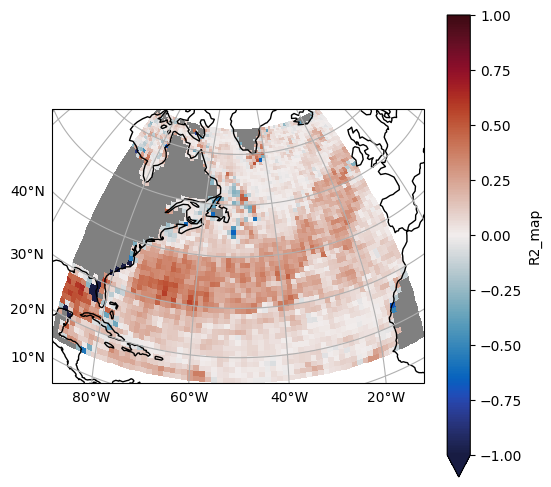

In [641]:
plot(xr.open_dataset('test.nc').R2_map, vmax=1)

In [631]:
skill

<xarray.Dataset>
Dimensions:                (yh: 225, xh: 300, xq: 300, yq: 225, time: 220,
                            freq_r_NA: 8, freq_r_tNA: 5, freq_time: 109,
                            freq_r_Pacific: 8, freq_r_tPacific: 5,
                            freq_r_Equator: 25, freq_r_tEquator: 17,
                            freq_r_ACC: 16, freq_r_tACC: 11)
Coordinates: (12/14)
  * xh                     (xh) float64 -279.4 -278.2 -277.0 ... 77.0 78.2 79.4
  * xq                     (xq) float64 -278.8 -277.6 -276.4 ... 77.6 78.8 80.0
  * yh                     (yh) float64 -80.88 -80.37 -79.86 ... 89.24 89.75
  * yq                     (yq) float64 -80.62 -80.12 -79.61 ... 89.49 90.0
  * time                   (time) object 0198-01-01 12:00:00 ... 0200-12-31 1...
  * freq_r_NA              (freq_r_NA) float64 3.395e-06 7.843e-06 ... 3.678e-05
    ...                     ...
  * freq_r_Pacific         (freq_r_Pacific) float64 3.516e-06 ... 3.76e-05
  * freq_r_tPacific        (freq_r_tPacific) float64 3.516e-06 ... 2.325e-05
  * freq_r_Equator         (freq_r_Equator) float64 1.039e-06 ... 3.386e-05
  * freq_r_tEquator        (freq_r_tEquator) float64 1.039e-06 ... 2.305e-05
  * freq_r_ACC             (freq_r_ACC) float64 2.206e-06 ... 5.276e-05
  * freq_r_tACC            (freq_r_tACC) float64 2.206e-06 ... 3.603e-05
Data variables: (12/87)
    dxT                    (yh, xh) float32 2.116e+04 2.116e+04 ... 5.588e+04
    dyT                    (yh, xh) float32 5.636e+04 5.636e+04 ... 1.114e+03
    dyCu                   (yh, xq) float32 5.401e+04 5.401e+04 ... 6.565e-12
    dxCv                   (yq, xh) float32 2.174e+04 2.174e+04 ... 5.587e+04
    dyBu                   (yq, xq) float32 5.636e+04 5.636e+04 ... 6.565e-12
    dxBu                   (yq, xq) float32 2.174e+04 2.174e+04 ... 5.536e+04
    ...                     ...
    KE_spec_ACC            (time, freq_r_tACC) float64 1.962e+03 446.9 ... 92.78
    power_time_ACC         (freq_time) float64 9.884e-13 1.325e-12 ... 1.154e-13
    KE_time_ACC            (freq_time) float64 0.1212 0.1499 ... 0.01043 0.01174
    transfer_ZB_ACC        (time, freq_r_ACC) float64 1.943e-11 ... 1.546e-10
    power_ZB_ACC           (time, freq_r_ACC) float64 2.691e-12 ... 1.982e-10
    power_time_ZB_ACC      (freq_time) float64 1.71e-13 2.141e-13 ... 2.188e-15

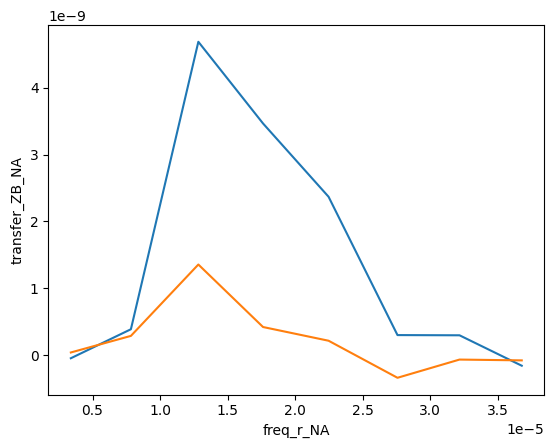

In [636]:
skill.transfer_NA.mean('time').plot()
skill.transfer_ZB_NA.mean('time').plot()